# PRACTISE CASE TIME SERIES ANALYSIS
### ANSWERED BY DWI SMARADAHANA INDRALOKA
***

## METHOD 1
***

## Import Library

In [350]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pmdarima
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams["figure.figsize"] = 10, 5

## Upload Dataset

In [351]:
data = pd.read_csv("tute1.csv")
data.head()

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


## Change the Column's Name

In [352]:
data.columns = ["Month", "Sales", "AdBudget", "GDP"]
data.head()

,Month,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


## Change Column Month Value into Date Time 

In [353]:
f = "%b-%y"
data["Month"] = data["Month"].apply(lambda x: datetime.strptime(x, f))
data.head()

,Month,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


## Take Only Month Data and Sales Data

In [354]:
data_sales = ["Month", "Sales"]
data_sales = data[data_sales]

## Change Month Column into Index

In [355]:
data_sales["Month"] = pd.to_datetime(data_sales["Month"], infer_datetime_format = True)
data_sales = data_sales.set_index(["Month"])

In [356]:
data_sales.head()

,Sales
Month,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


## Make Time Series Plotting from Sales Data

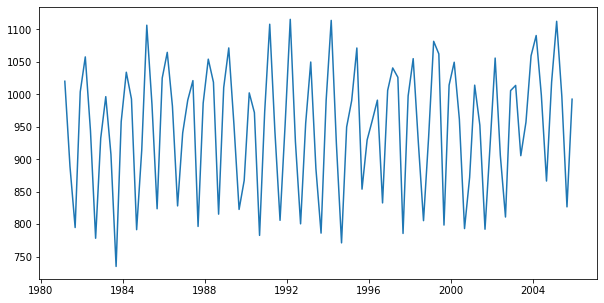

In [357]:
plt.plot(data_sales)

## Rolling Mean and Standard Deviation

rolmean = data_sales.rolling(window = 4).mean()
rolstd = data_sales.rolling(window = 4).std()

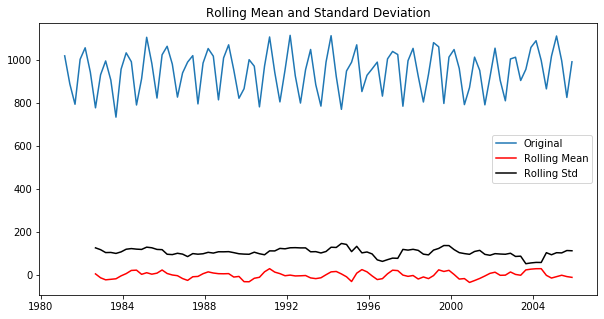

In [358]:
orig = plt.plot(data_sales, label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

In [359]:
from statsmodels.tsa.stattools import adfuller
print ("Result of Dickey-Fuller Test:")
dftest = adfuller(data_sales["Sales"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -3.262755
p-value                        0.016628
#Lags Used                     9.000000
Number of Observation Used    90.000000
Critical Value (1%)           -3.505190
Critical Value (5%)           -2.894232
Critical Value (10%)          -2.584210
dtype: float64


## Stasionarize the Data

In [360]:
data_sales_logScale = np.log(data_sales)

In [361]:
rolmean = data_sales_logScale.rolling(window = 4).mean()
rolstd = data_sales_logScale.rolling(window = 4).std()

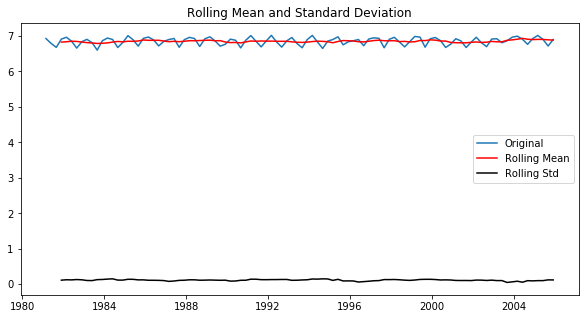

In [362]:
orig = plt.plot(data_sales_logScale, label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

In [363]:
from statsmodels.tsa.stattools import adfuller
print ("Result of Dickey-Fuller Test:")
dftest = adfuller(data_sales_logScale["Sales"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -2.944119
p-value                        0.040453
#Lags Used                     8.000000
Number of Observation Used    91.000000
Critical Value (1%)           -3.504343
Critical Value (5%)           -2.893866
Critical Value (10%)          -2.584015
dtype: float64


***
Based on the graphic above, we can see that trends and variances have shown stable results, so we can do ARIMA modeling.
***

## Set the Value of p and q Based on ACF and PACF Plotting

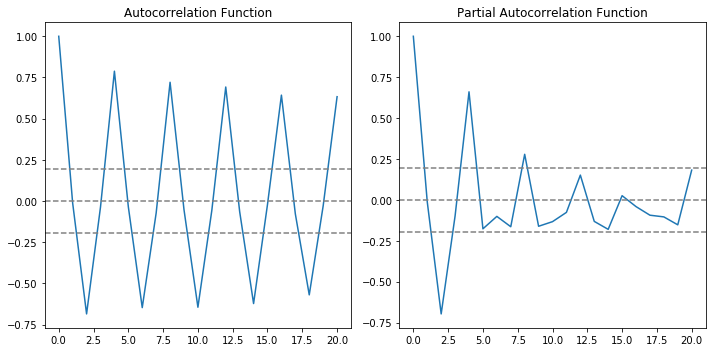

In [364]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_sales_logScale, nlags=20)
lag_pacf = pacf(data_sales_logScale, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_sales_logScale)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_sales_logScale)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_sales_logScale)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_sales_logScale)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

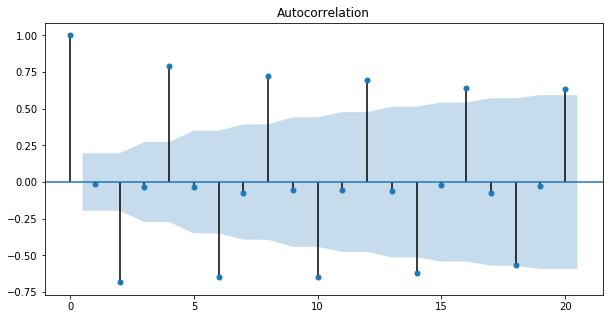

In [365]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sales_logScale, lags = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

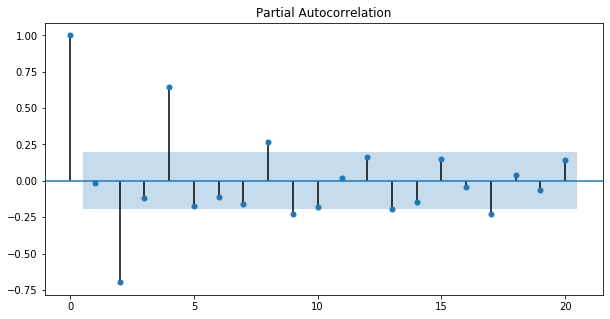

In [366]:
plot_pacf(data_sales_logScale, lags = 20)
plt.show

***
Based on the graphic above, we set the value of p = 4 and q = 0
***

## ARIMA Modelling

Plotting MA model


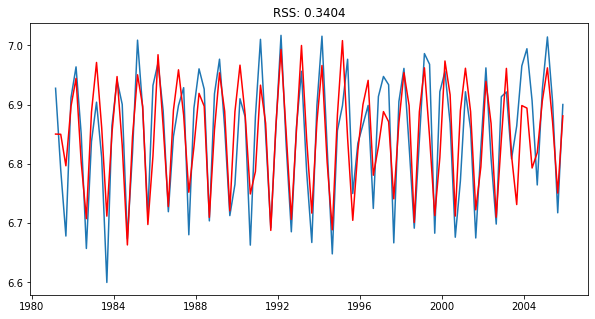

In [367]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_sales_logScale, order=(4,0,0))
results_AR1 = model.fit(disp=-1)
plt.plot(data_sales_logScale)
plt.plot(results_AR1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR1.fittedvalues-data_sales_logScale["Sales"])**2))
print('Plotting MA model')

## Calculate the MAE and MSE from the Model

In [368]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
mae = mae(np.exp(data_sales_logScale), np.exp(results_AR1.fittedvalues))
mse = mse(np.exp(data_sales_logScale), np.exp(results_AR1.fittedvalues))
print("mae:", mae)
print("mse:", mse)

mae: 45.145011571885526
mse: 3067.458206159662


In [369]:
print(results_AR1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(4, 0)   Log Likelihood                 142.392
Method:                       css-mle   S.D. of innovations              0.057
Date:                Fri, 06 Sep 2019   AIC                           -272.784
Time:                        01:36:23   BIC                           -257.153
Sample:                    03-01-1981   HQIC                          -266.457
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8504      0.009    789.105      0.000       6.833       6.867
ar.L1.Sales    -0.0105      0.075     -0.140      0.889      -0.157       0.136
ar.L2.Sales    -0.2406      0.073     -3.304    

## Try Another Value of p and q Using Auto ARIMA

In [370]:
from pmdarima import auto_arima
stepwise_model = auto_arima(data_sales_logScale, start_p = 4, seasonal = True,
                            trace = True, error_action = "ignore",  
                            suppress_warnings = True, 
                            stepwise = True)

Fit ARIMA: order=(4, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-271.400, BIC=-250.559, Fit time=0.276 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-161.288, BIC=-156.078, Fit time=0.024 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-159.303, BIC=-151.488, Fit time=0.036 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-160.698, BIC=-152.882, Fit time=0.044 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-255.289, BIC=-237.053, Fit time=0.317 seconds
Fit ARIMA: order=(5, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-270.450, BIC=-247.003, Fit time=0.460 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-272.161, BIC=-253.925, Fit time=0.296 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-220.649, BIC=-207.623, Fit time=0.136 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-215.926, BIC=-200.295, Fit time=0.179 seconds
Fit ARIMA: order=(5, 0, 1) seasonal_o

## ARIMA Modelling with Order = (5, 0, 0)

In [371]:
model2 = ARIMA(data_sales_logScale, order=(5,0,0))
results_AR3 = model2.fit(disp=-1)
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
mae = mae(np.exp(data_sales_logScale), np.exp(results_AR3.fittedvalues))
mse = mse(np.exp(data_sales_logScale), np.exp(results_AR3.fittedvalues))
print("mae:", mae)
print("mse:", mse)

mae: 44.21235788318522
mse: 2972.086262642052


In [372]:
print(results_AR2.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(4, 1)   Log Likelihood                 143.643
Method:                       css-mle   S.D. of innovations              0.056
Date:                Fri, 06 Sep 2019   AIC                           -273.286
Time:                        01:36:27   BIC                           -255.050
Sample:                    03-01-1981   HQIC                          -265.906
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8502      0.008    886.565      0.000       6.835       6.865
ar.L1.Sales    -0.1436      0.120     -1.199      0.234      -0.378       0.091
ar.L2.Sales    -0.2510      0.076     -3.290    

***
From the value of MAE, MSE, AIC and BIC so we chose ARIMA Model with order (5, 0, 0)
***

## Plotting Sales vs Forecast

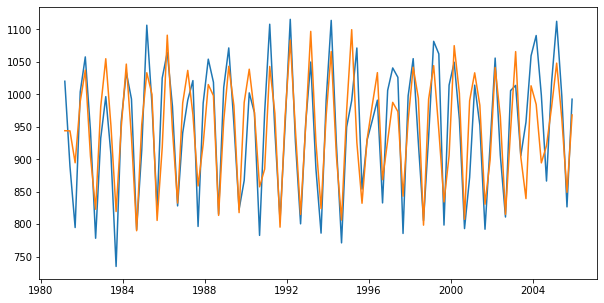

In [373]:
plt.plot(np.exp(data_sales_logScale))
plt.plot(np.exp(results_AR2.fittedvalues))

## Predict for Next Three Period

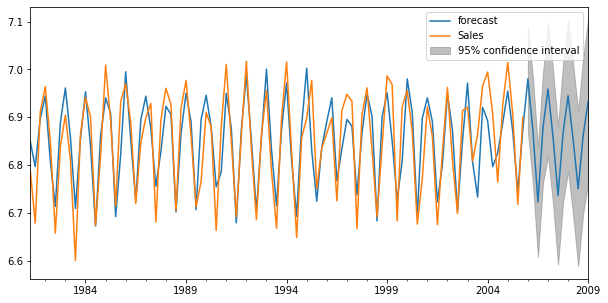

In [374]:
results_AR2.plot_predict(1,112)
x = results_AR2.forecast(steps = 120)

In [375]:
future_forecast = stepwise_model.predict(n_periods = 12)
future_forecast = np.exp(future_forecast)
predict = pd.DataFrame(future_forecast, columns = ["Future Predict"])
predict

,Future Predict
0,1071.446636
1,962.710331
2,829.003472
3,969.824644
4,1050.155527
5,949.959020
6,840.279358
7,960.800360
8,1037.490297
9,944.841498


***

## METHOD 2
***

## Make Time Series Plotting from Sales Data

In [376]:
data_sales.head()

,Sales
Month,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


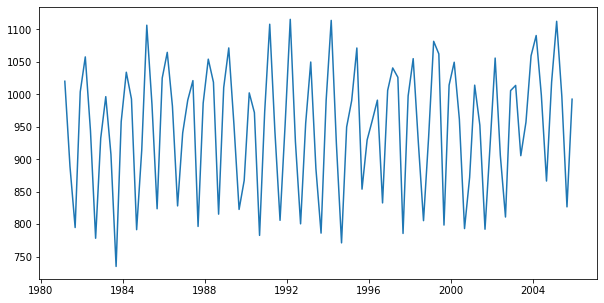

In [377]:
plt.plot(data_sales)

## Rolling Mean and Standard Deviation

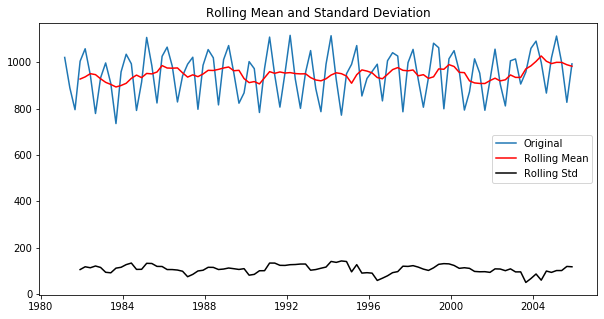

In [378]:
rolmean = data_sales.rolling(window = 4).mean()
rolstd = data_sales.rolling(window = 4).std()
orig = plt.plot(data_sales, label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

## Stasionarize the Data

In [379]:
moving_avg = data_sales.rolling(4).mean()
mte_moving_avg_diff = data_sales - moving_avg
mte_moving_avg_diff.head()

,Sales
Month,
1981-03-01,NaN
1981-06-01,NaN
1981-09-01,NaN
1981-12-01,76.825
1982-03-01,121.250


In [380]:
mte_moving_avg_diff.dropna(inplace=True)

## Rolling Mean and Standard Deviation

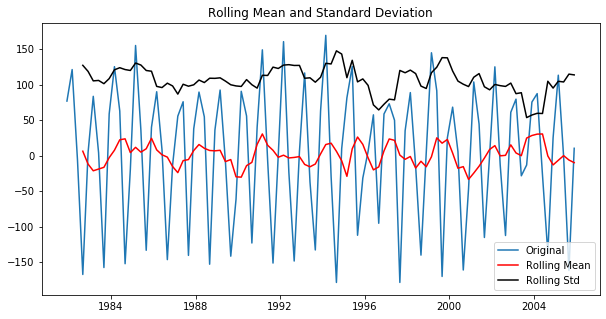

In [381]:
rolmean = mte_moving_avg_diff.rolling(window = 4).mean()
rolstd = mte_moving_avg_diff.rolling(window = 4).std()
orig = plt.plot(mte_moving_avg_diff, label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

In [382]:
from statsmodels.tsa.stattools import adfuller
print ("Result of Dickey-Fuller Test:")
dftest = adfuller(mte_moving_avg_diff["Sales"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -4.862732
p-value                        0.000041
#Lags Used                     9.000000
Number of Observation Used    87.000000
Critical Value (1%)           -3.507853
Critical Value (5%)           -2.895382
Critical Value (10%)          -2.584824
dtype: float64


## Find Value of Seasonal Order Using Auto ARIMA

In [383]:
from pmdarima import auto_arima
stepwise_model = auto_arima(mte_moving_avg_diff, m = 4, seasonal = True,
                            trace = True, error_action = "ignore",  
                            suppress_warnings = True, 
                            stepwise = True)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=1002.363, BIC=1022.961, Fit time=0.417 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=1162.303, BIC=1167.452, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=1047.288, BIC=1057.587, Fit time=0.076 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=1094.632, BIC=1104.930, Fit time=0.080 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 1, 4); AIC=1020.687, BIC=1038.710, Fit time=0.291 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=1002.083, BIC=1025.256, Fit time=0.697 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 0, 4); AIC=1010.326, BIC=1030.924, Fit time=0.483 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=1028.131, BIC=1053.879, Fit time=0.357 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 0, 4); AIC=1015.945, BIC=1033.968, Fit time=0.330 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_o

## SARIMA Modelling

In [384]:
sarima = sm.tsa.statespace.SARIMAX(mte_moving_avg_diff, order=(2,0,3), seasonal_order=(2,0,1,4), enforce_stationarity=False,
                                   enforce_invertibility=False).fit()

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
mae = mae(mte_moving_avg_diff, sarima.fittedvalues)
mse = mse(mte_moving_avg_diff, sarima.fittedvalues)
print("mae:", mae)
print("mse:", mse)
print(sarima.summary())

mae: 35.38171289481831
mse: 2571.157691024651
                                 Statespace Model Results                                
Dep. Variable:                             Sales   No. Observations:                   97
Model:             SARIMAX(2, 0, 3)x(2, 0, 1, 4)   Log Likelihood                -445.467
Date:                           Fri, 06 Sep 2019   AIC                            908.933
Time:                                   01:37:40   BIC                            931.127
Sample:                               12-01-1981   HQIC                           917.870
                                    - 12-01-2005                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7615      0.459     -1.658      0.097      -1.662       0.1

<function matplotlib.pyplot.show(*args, **kw)>

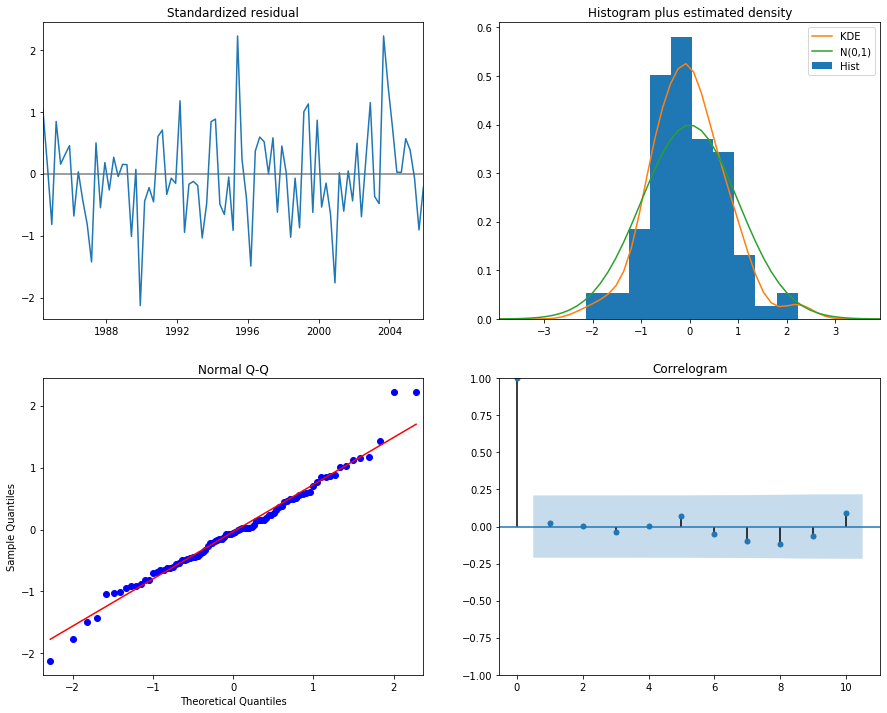

In [385]:
sarima.plot_diagnostics(figsize=(15, 12))
plt.show

## Plotting Sales vs Forecast

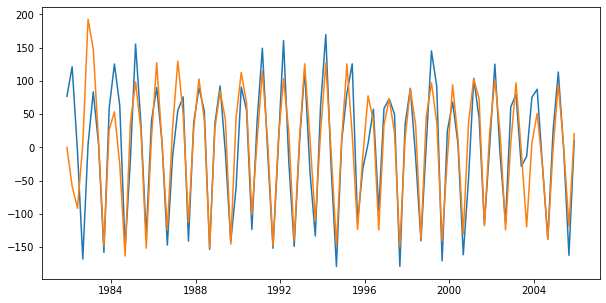

In [386]:
plt.plot(mte_moving_avg_diff)
plt.plot(sarima.fittedvalues)

## Predict for Next Three Period

In [389]:
future_forecast1 = stepwise_model.predict(n_periods = 12)
future_forecast1 = future_forecast1
predict1 = pd.DataFrame(future_forecast1, columns = ["Future Predict"])
predict1

,Future Predict
0,102.359816
1,12.428050
2,-134.910735
3,17.873353
4,99.038492
5,13.795687
6,-130.284565
7,19.030024
8,98.143992
9,14.004768


***

## METHOD 3
***

## Holt-Winter’s Seasonal Smoothing Modelling

In [390]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data_sales, trend = "add", seasonal = "add", seasonal_periods = 4)

fit = model.fit()

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
mae = mae(data_sales, fit.fittedvalues)
mse = mse(data_sales, fit.fittedvalues)
print("mae:", mae)
print("mse:", mse)
print(fit.summary())

mae: 38.34361202219128
mse: 2471.5306021531187
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  100
Model:             ExponentialSmoothing   SSE                         247153.060
Optimized:                         True   AIC                            797.259
Trend:                         Additive   BIC                            818.101
Seasonal:                      Additive   AICC                           799.731
Seasonal Periods:                     4   Date:                 Fri, 06 Sep 2019
Box-Cox:                          False   Time:                         01:38:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0526316                alpha

## Plotting Sales vs Forecast

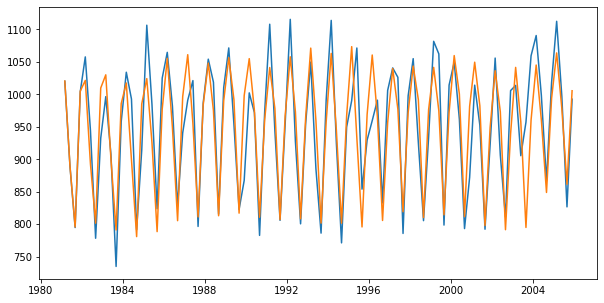

In [391]:
plt.plot(data_sales)
plt.plot(fit.fittedvalues)

***
## Conclusion
From three method above, fist method (ARIMA with Logaritmic Stasionarize) has MAE value: 44.21 and MSE value: 2972.08, second method (SARIMA with Moving Average Stasionarize) has MAE value: 35.38 and MSE value: 2571.15, third method (Holt-Winter’s Seasonal Smoothing without Stasionarize) has MAE value: 38.34 and MSE value: 2471.53. I think the best method is the third method, because withou any Data Stasionarizing can get the smallest MSE value.
***

***
# THANK YOU
***